# **TFG**  

***USE OF ML AND SNOMED CT ENCODED HEALTH PROBLEMS TO PREDICT HOSPITAL DISCHARGE DIAGNOSES***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

%matplotlib inline

## **Data Importation**

In [2]:
# Import data
data_all = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/03_data/merged_df.csv')
data_all

,nhc,episode_ref,sex_atr,age,age_group,death,episode_duration,care_level_duration,num_health_issues,ongoing,...,prescription_drug_dose_mean,prescription_drug_unit,prescription_phform_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref,diag_class_ref,icd10_capitulo
0,5051436,354709,1,41,36-50,1,58 days 09:41:16,16 days 09:35:57,8,1,...,5.000000,ML,152.0,2.0301,284.0,4.0,3.0,7.0,S,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU..."
1,410878,474983,2,74,66-80,0,56 days 14:45:12,0 days 03:34:29,8,1,...,2.000000,ML,207.0,2.3206,231.0,3.0,2.0,6.0,S,ENFERMEDADES DEL SISTEMA GENITOURINARIO
2,5051436,354709,1,41,36-50,1,58 days 09:41:16,2 days 22:35:19,8,1,...,498.750000,ML,152.0,2.0301,284.0,4.0,3.0,7.0,S,ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉ...
3,410878,474983,2,74,66-80,0,56 days 14:45:12,0 days 02:51:23,8,1,...,4.800000,ML,207.0,2.3206,231.0,3.0,2.0,6.0,S,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA..."
4,5051436,354709,1,41,36-50,1,58 days 09:41:16,16 days 09:35:57,8,1,...,2.000000,ML,207.0,2.0301,284.0,4.0,3.0,7.0,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045979,38823,417735,1,53,51-65,0,5 days 20:00:00,5 days 20:00:00,5,1,...,500.000000,ML,152.0,0.5676,465.0,2.0,1.0,11.0,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
1045980,70400286,367139,1,69,66-80,1,28 days 01:00:48,13 days 23:51:25,11,1,...,2.666667,ML,207.0,5.8134,179.0,4.0,4.0,5.0,S,ENFERMEDADES DEL SISTEMA GENITOURINARIO
1045981,5051436,354709,1,41,36-50,1,58 days 09:41:16,2 days 22:35:19,8,1,...,500.000000,ML,152.0,2.0301,284.0,4.0,3.0,7.0,S,CAUSAS EXTERNAS DE MORBILIDAD
1045982,410878,474983,2,74,66-80,0,56 days 14:45:12,20 days 01:56:12,8,1,...,2.000000,ML,207.0,2.3206,231.0,3.0,2.0,6.0,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [3]:
# Organize columns order
data_all = data_all[['nhc', 'sex_atr', 'age', 'age_group', 'death', 
             'episode_ref', 'episode_duration', 
             'care_level_duration',
             'num_health_issues', 'ongoing', 'health_issue_motive', 'health_issue_ou_med_ref', 'snomed_descr', 'snomed_code', 
             'rc_sap_ref', 'clinical_records_result_num_mean', 'clinical_records_units', 'cr_meas_type_ref',
             'lab_sap_ref', 'lab_result_num_mean', 'lab_units', 
             'adm_route_ref', 'adm_prn', 'adm_given', 'no_administration_reason_ref', 'adm_drug_ref', 
             'adm_drug_dose_mean', 'adm_drug_unit', 'adm_atc_ref', 
             'prescription_adm_route_ref', 'prescription_prn', 'prescription_freq_ref', 'prescription_drug_ref', 
             'prescription_drug_dose_mean', 
             'prescription_drug_unit', 'prescription_atc_ref', 'prescription_phform_ref',
             'drg_weight', 'drg_ref', 'drg_soi_ref', 'drg_rom_ref', 'drg_mdc_ref',
             'diag_class_ref', 'icd10_capitulo',]]

In [10]:
# Remove uncesessary columns
data = data_all[['sex_atr', 'age', 'death', 
             'episode_duration', 
             'care_level_duration',
             'num_health_issues', 'ongoing', 'health_issue_motive', 'health_issue_ou_med_ref', 'snomed_code', 
             'rc_sap_ref', 'clinical_records_result_num_mean', 'clinical_records_units', 'cr_meas_type_ref',
             'lab_sap_ref', 'lab_result_num_mean', 'lab_units', 
             'adm_route_ref', 'adm_prn', 'adm_given', 'no_administration_reason_ref', 'adm_drug_ref', 
             'adm_drug_dose_mean', 'adm_drug_unit', 'adm_atc_ref', 
             'prescription_adm_route_ref', 'prescription_prn', 'prescription_freq_ref', 'prescription_drug_ref', 
             'prescription_drug_dose_mean', 
             'prescription_drug_unit', 'prescription_atc_ref', 'prescription_phform_ref',
             'drg_weight', 'drg_ref', 'drg_soi_ref', 'drg_rom_ref', 'drg_mdc_ref',
             'diag_class_ref', 'icd10_capitulo',]]

In [5]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

# Print duplicates if they exist
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [6]:
# Check for missing values
missing_values = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': data.isnull().mean() * 100})

display(missing_values)

,Missing Count,Missing Percentage
sex_atr,0,0.0
age,0,0.0
age_group,0,0.0
death,0,0.0
episode_duration,0,0.0
care_level_duration,0,0.0
num_health_issues,0,0.0
ongoing,0,0.0
health_issue_motive,0,0.0
health_issue_ou_med_ref,0,0.0


In [7]:
# Statistical summary for numerical data
numerical_data = data.select_dtypes(include=['number'])
numerical_summary = numerical_data.describe()
numerical_summary

,sex_atr,age,death,num_health_issues,ongoing,health_issue_motive,snomed_code,clinical_records_result_num_mean,cr_meas_type_ref,lab_result_num_mean,...,adm_drug_dose_mean,prescription_adm_route_ref,prescription_prn,prescription_drug_dose_mean,prescription_phform_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref
count,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,...,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06
mean,1.496392e+00,6.523114e+01,2.009916e-01,5.524095e+00,8.681519e-01,1.533219e+00,3.028449e+08,6.446537e+01,9.195169e-01,3.678136e+01,...,1.263959e+02,2.217890e+02,1.685016e-01,1.648502e+02,1.663553e+02,4.247697e+00,3.060435e+02,3.252590e+00,2.788872e+00,9.051115e+00
std,4.999872e-01,1.359151e+01,4.007420e-01,2.845856e+00,3.383257e-01,2.048691e+00,3.941586e+08,3.325238e+01,8.558544e-01,6.382987e+01,...,1.992800e+02,1.030775e+02,3.743113e-01,2.212345e+02,3.357951e+01,3.981829e+00,2.254272e+02,7.980954e-01,9.520007e-01,4.877245e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.550010e+05,1.188889e+01,0.000000e+00,0.000000e+00,...,5.000000e-01,1.000000e+02,0.000000e+00,6.666667e-01,1.000000e+02,2.906000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,5.700000e+01,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,6.685701e+07,3.587500e+01,0.000000e+00,6.333333e-01,...,1.750000e+00,1.500000e+02,0.000000e+00,2.000000e+00,1.520000e+02,2.030100e+00,1.830000e+02,3.000000e+00,2.000000e+00,6.000000e+00
50%,1.000000e+00,7.200000e+01,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.887320e+08,6.950000e+01,1.000000e+00,5.257143e+00,...,5.000000e+00,1.500000e+02,0.000000e+00,5.750000e+00,1.520000e+02,2.320600e+00,2.490000e+02,3.000000e+00,3.000000e+00,7.000000e+00
75%,2.000000e+00,7.400000e+01,0.000000e+00,8.000000e+00,1.000000e+00,3.000000e+00,4.023550e+08,9.304762e+01,2.000000e+00,7.241111e+01,...,1.000000e+02,3.500000e+02,0.000000e+00,4.954000e+02,2.070000e+02,5.928000e+00,4.400000e+02,4.000000e+00,4.000000e+00,1.100000e+01
max,2.000000e+00,9.600000e+01,1.000000e+00,1.300000e+01,1.000000e+00,6.000000e+00,2.147484e+09,1.850000e+02,2.000000e+00,6.520000e+02,...,5.000000e+02,3.500000e+02,1.000000e+00,5.000000e+02,2.160000e+02,1.793630e+01,9.520000e+02,4.000000e+00,4.000000e+00,2.400000e+01


In [8]:
# Statistical summary for categorical data
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_summary = categorical_data.describe()
categorical_summary

,age_group,episode_duration,care_level_duration,health_issue_ou_med_ref,rc_sap_ref,clinical_records_units,lab_sap_ref,lab_units,adm_drug_ref,adm_drug_unit,adm_atc_ref,prescription_freq_ref,prescription_drug_ref,prescription_drug_unit,prescription_atc_ref,diag_class_ref,icd10_capitulo
count,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984
unique,5,426,660,47,10,5,23,9,16,2,15,28,12,2,11,3,20
top,66-80,56 days 14:45:12,16 days 09:35:57,UTH,PRESN_DIA,mm Hg,LAB1316,10^9/L,E96F5C461C27EF6FE1000000AC100155,ML,N02BE01,C/8H,3B875C468000801EE1000000AC100155,ML,N02BE01,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
freq,642946,171509,29124,150704,173795,281606,66653,342048,167092,765834,213287,396214,156265,883173,182126,809283,211968


In [9]:
# Value counts of the 'icd10_capitulo' column
data['icd10_capitulo'].value_counts()

icd10_capitulo
FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS                       211968
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                                                   111154
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                                           108634
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                                         93312
SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO     82998
LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS                                         74850
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                                                      59964
TUMORES (NEOPLASIAS)                                                                                       55096
ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉTICOS Y TRASTORNOS QUE AFECTAN AL M

## **Check Data Types & Encoding Categorical Variables**

In [11]:
print(data.dtypes)

sex_atr                               int64
age                                   int64
death                                 int64
episode_duration                     object
care_level_duration                  object
num_health_issues                     int64
ongoing                               int64
health_issue_motive                   int64
health_issue_ou_med_ref              object
snomed_code                           int64
rc_sap_ref                           object
clinical_records_result_num_mean    float64
clinical_records_units               object
cr_meas_type_ref                    float64
lab_sap_ref                          object
lab_result_num_mean                 float64
lab_units                            object
adm_route_ref                       float64
adm_prn                             float64
adm_given                           float64
no_administration_reason_ref        float64
adm_drug_ref                         object
adm_drug_dose_mean              

In [12]:
# Set int63 to int32
data['sex_atr'] = data['sex_atr'].astype('int32')
data['age'] = data['age'].astype('int32')
data['death'] = data['death'].astype('int32')
data['num_health_issues'] = data['num_health_issues'].astype('int32')
data['ongoing'] = data['ongoing'].astype('int32')
data['health_issue_motive'] = data['health_issue_motive'].astype('int32')
data['cr_meas_type_ref'] = data['cr_meas_type_ref'].astype('int32')
data['adm_route_ref'] = data['adm_route_ref'].astype('int32')
data['adm_prn'] = data['adm_prn'].astype('int32')
data['adm_given'] = data['adm_given'].astype('int32')
data['no_administration_reason_ref'] = data['no_administration_reason_ref'].astype('int32')
data['prescription_adm_route_ref'] = data['prescription_adm_route_ref'].astype('int32')
data['prescription_prn'] = data['prescription_prn'].astype('int32')
data['prescription_phform_ref'] = data['prescription_phform_ref'].astype('int32')
data['drg_ref'] = data['drg_ref'].astype('int32')
data['drg_soi_ref'] = data['drg_soi_ref'].astype('int32')
data['drg_rom_ref'] = data['drg_rom_ref'].astype('int32')
data['drg_mdc_ref'] = data['drg_mdc_ref'].astype('int32')

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\1753854805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex_atr'] = data['sex_atr'].astype('int32')
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\1753854805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype('int32')
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\1753854805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [13]:
# Calculate episode_duration and care_level_duration in hours
data['episode_duration'] = pd.to_timedelta(data['episode_duration'])
data['episode_duration'] = data['episode_duration'].dt.total_seconds() / 3600

data['care_level_duration'] = pd.to_timedelta(data['care_level_duration'])
data['care_level_duration'] = data['care_level_duration'].dt.total_seconds() / 3600

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\4195865394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['episode_duration'] = pd.to_timedelta(data['episode_duration'])
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\4195865394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['episode_duration'] = data['episode_duration'].dt.total_seconds() / 3600
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\4195865394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [ ]:
# Label encode icd10_capitulo
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

icd10_encoder = LabelEncoder()
data['icd10_capitulo'] = icd10_encoder.fit_transform(data['icd10_capitulo'])

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4072\2072407379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['icd10_capitulo'] = icd10_encoder.fit_transform(data['icd10_capitulo'])


In [15]:
# One hot encode other variables using pycaret
from pycaret.classification import *

# Configuración del entorno de PyCaret
clf = setup(data=data, target='icd10_capitulo', session_id=123, verbose=True)

,Description,Value
0,Session id,123
1,Target,icd10_capitulo
2,Target type,Multiclass
3,Original data shape,"(1045984, 40)"
4,Transformed data shape,"(1045984, 135)"
5,Transformed train set shape,"(732188, 135)"
6,Transformed test set shape,"(313796, 135)"
7,Numeric features,26
8,Categorical features,13
9,Preprocess,True


In [16]:
# Check encoding process
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\CINDYC~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sex_atr', 'age', 'death',
                                             'episode_duration',
                                             'care_level_duration',
                                             'num_health_issues', 'ongoing',
                                             'health_issue_motive',
                                             'snomed_code',
                                             'clinical_records_result_num_mean',
                                             'cr_meas_type_ref',
                                             'lab_result_num...
                ('rest_encoding',
                 TransformerWrapper(exclude=None,
                                    include=['health_issue_ou_med_ref',
                                             'prescription_freq_ref'],
                                    transformer=TargetEncoder(cols=['health_issue_ou_med_ref',
                                                                    'prescription_freq_ref'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0)))],
         verbose=False)

In [17]:
# Get final encoded dataset
data_encoded = get_config('pipeline').transform(get_config('X'))
data_encoded = data_encoded.join(data['icd10_capitulo'])
data_encoded

,sex_atr,age,death,episode_duration,care_level_duration,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,prescription_phform_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref,diag_class_ref_S,diag_class_ref_H,diag_class_ref_P,icd10_capitulo
485141,2.0,81.0,1.0,706.924438,706.924438,3.0,1.0,1.0,11.859204,240131006.0,...,152.0,1.7913,469.0,4.0,4.0,11.0,1.0,0.0,0.0,17
439838,1.0,47.0,0.0,287.425842,146.750000,3.0,1.0,0.0,10.077813,109989006.0,...,207.0,0.9884,662.0,3.0,3.0,16.0,1.0,0.0,0.0,17
221693,1.0,73.0,0.0,2222.074951,1703.783569,5.0,1.0,4.0,9.377647,439740005.0,...,152.0,5.9280,260.0,4.0,4.0,7.0,1.0,0.0,0.0,1
447761,2.0,74.0,0.0,1358.753296,433.244171,8.0,1.0,0.0,10.600160,433146000.0,...,152.0,2.3206,231.0,3.0,2.0,6.0,1.0,0.0,0.0,9
642742,2.0,74.0,0.0,1358.753296,481.936676,8.0,1.0,0.0,10.600160,307496006.0,...,207.0,2.3206,231.0,3.0,2.0,6.0,1.0,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841930,2.0,67.0,1.0,1842.586670,2.855278,4.0,1.0,1.0,10.965332,409623005.0,...,152.0,4.4717,710.0,4.0,4.0,18.0,1.0,0.0,0.0,14
999858,1.0,77.0,0.0,163.000000,94.935280,2.0,1.0,0.0,12.826443,230690007.0,...,110.0,2.0237,260.0,2.0,1.0,7.0,1.0,0.0,0.0,14
324130,2.0,45.0,0.0,1512.166626,107.043053,3.0,1.0,0.0,10.077813,307651005.0,...,110.0,17.9363,7.0,4.0,3.0,17.0,1.0,0.0,0.0,1
884642,2.0,54.0,0.0,1311.468872,1306.877197,1.0,1.0,0.0,9.260414,77493009.0,...,207.0,1.3415,320.0,2.0,1.0,8.0,0.0,1.0,0.0,15


## **Feature Selection & Subsets**

In [18]:
# Subset 1: all features
subset_1 = data_encoded.copy()
subset_1.to_csv('subset_1.csv', index=False)

### **Decision Trees**

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Extract features (X) and target (y)
X = data_encoded.drop(columns=['icd10_capitulo'])
y = data_encoded['icd10_capitulo']

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X, y)

# Get feature importances
dt_feature_importance = dt_model.feature_importances_

# Create a dataframe with the features and their importance
dt_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
display(dt_feature_importance_df)

,Feature,Importance
3,episode_duration,0.074186
4,care_level_duration,0.055324
63,no_administration_reason_ref,0.053782
130,drg_mdc_ref,0.052568
1,age,0.044301
...,...,...
132,diag_class_ref_H,0.001014
57,lab_units_pg,0.000970
42,lab_sap_ref_LAB1321,0.000952
106,prescription_drug_ref_1C7E5C468000801EE1000000...,0.000882


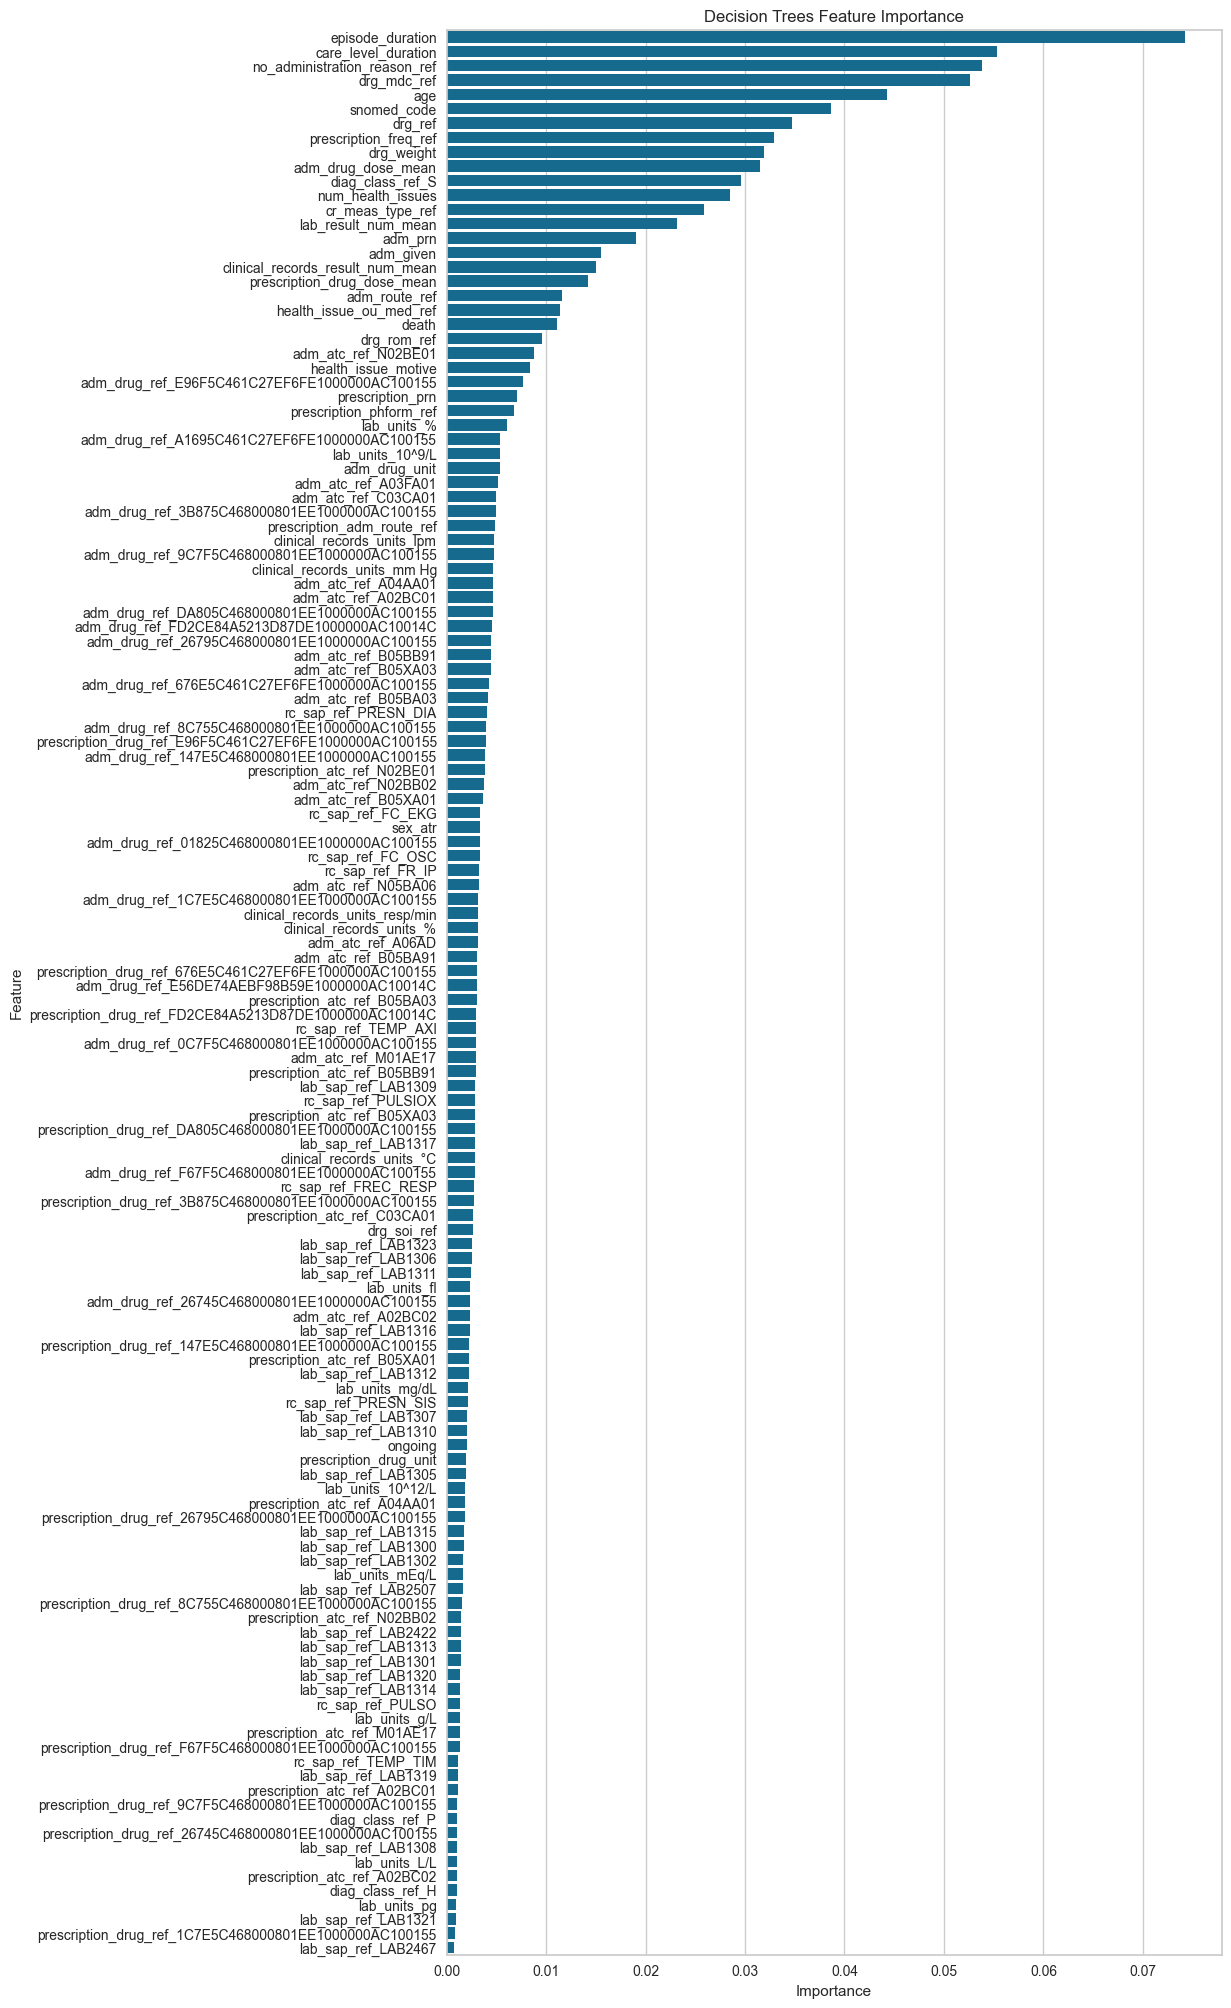

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 25))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df)
plt.title('Decision Trees Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

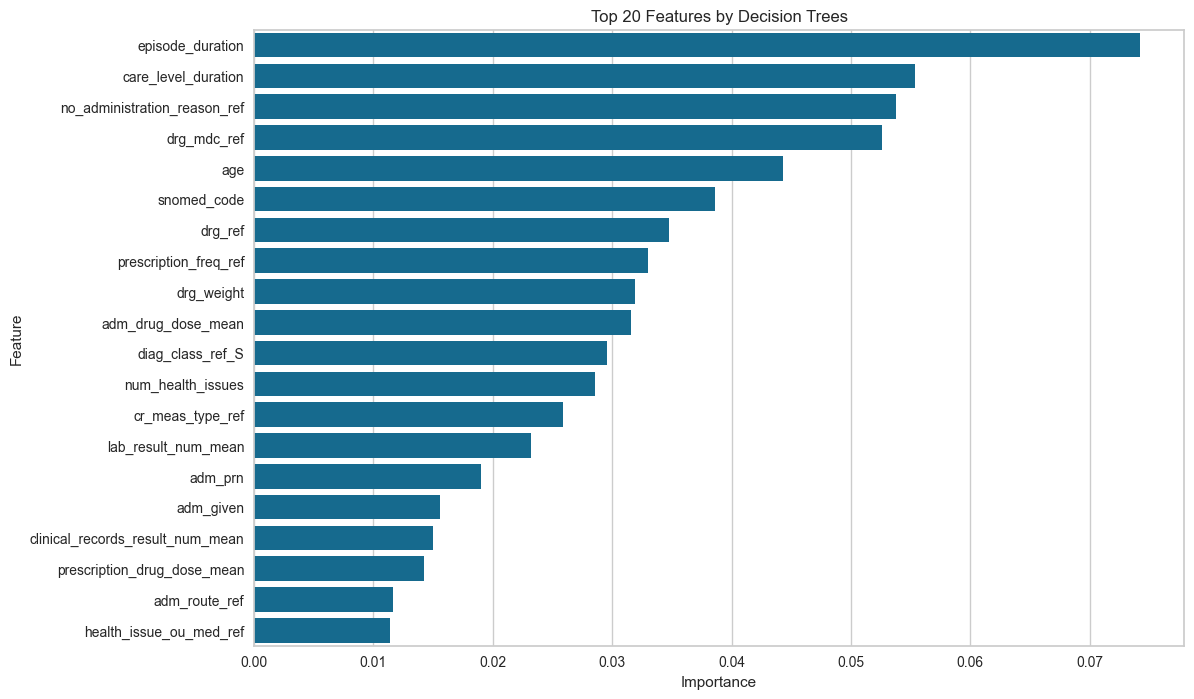

In [30]:
# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df.head(20))
plt.title('Top 20 Features by Decision Trees')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Subset 2: top 20 features from decision trees
top_20_dt_features = dt_feature_importance_df['Feature'].head(20).tolist()

# Create a new dataframe with only the top 20 features
subset_2 = X[top_20_dt_features]

# Add the icd10_capitulo column
subset_2 = pd.concat([subset_2, y], axis=1)
subset_2.to_csv('subset_2.csv', index=False)

In [ ]:
# Subset 3: top 10 features from decision trees
top_10_dt_features = dt_feature_importance_df['Feature'].head(10).tolist()

# Create a new dataframe with only the top 10 features
subset_3 = X[top_10_dt_features]

# Add the icd10_capitulo column
subset_3 = pd.concat([subset_3, y], axis=1)
subset_3.to_csv('subset_3.csv', index=False)

### **Univariate Selection**

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA F-test to each feature
anova_selector = SelectKBest(score_func=f_classif, k='all')  
anova_selector.fit(X, y)

# Create a dataframe with the features and their corresponding scores
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-statistic': anova_selector.scores_,
    'p-value': anova_selector.pvalues_
}).sort_values(by='ANOVA F-statistic', ascending=False)

# Show the results
display(anova_df)

,Feature,ANOVA F-statistic,p-value
131,diag_class_ref_S,32517.204788,0.000000e+00
132,diag_class_ref_H,31746.959175,0.000000e+00
8,health_issue_ou_med_ref,10642.084070,0.000000e+00
129,drg_rom_ref,6858.915780,0.000000e+00
0,sex_atr,6515.238452,0.000000e+00
...,...,...,...
17,rc_sap_ref_FC_EKG,49.477203,3.979783e-187
66,adm_drug_ref_FD2CE84A5213D87DE1000000AC10014C,46.971404,5.469752e-177
84,adm_atc_ref_B05BB91,46.971404,5.469752e-177
119,prescription_atc_ref_A02BC02,44.406346,1.274838e-166


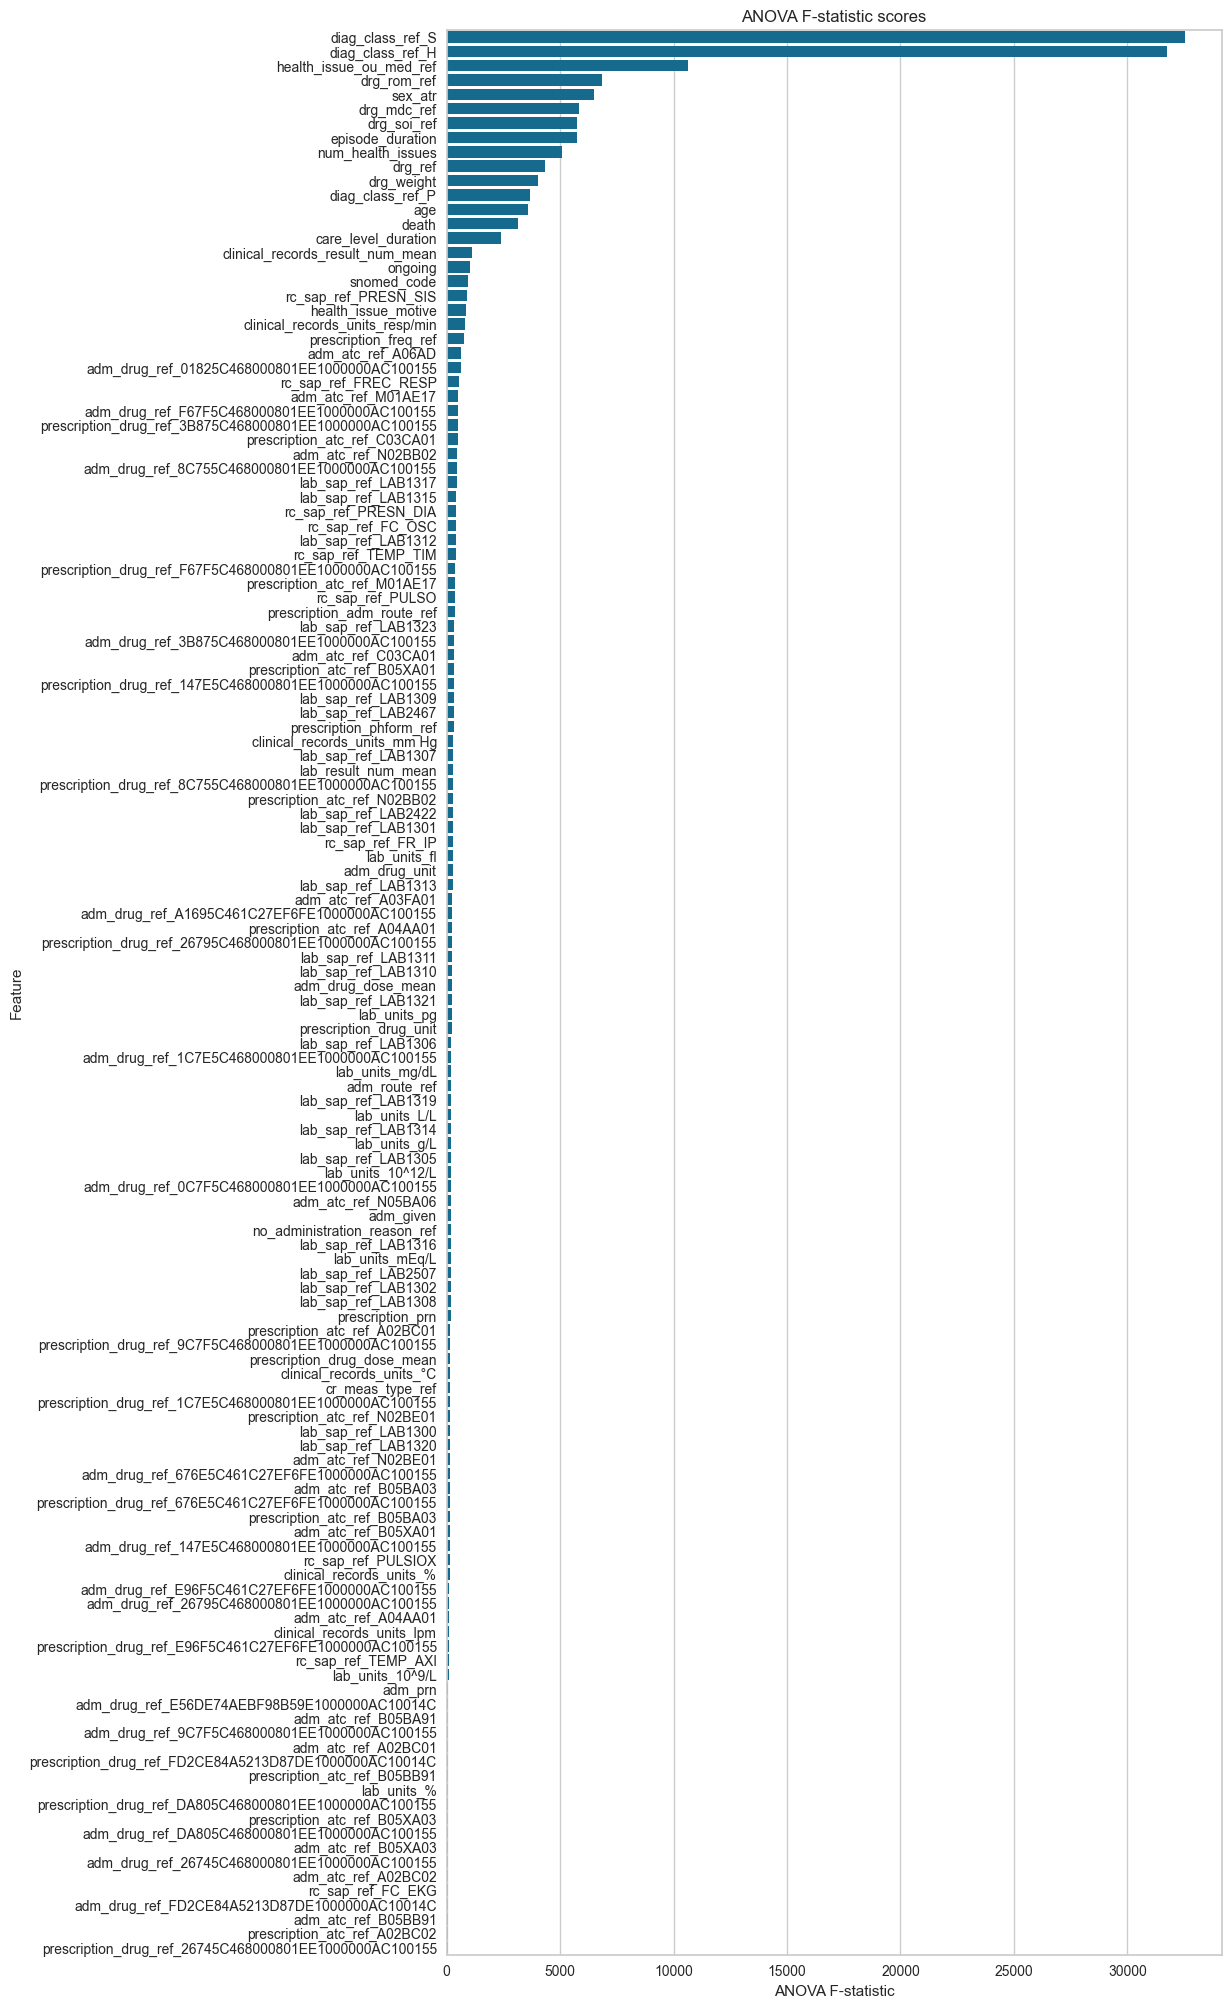

In [31]:
# Plot the anova scores
plt.figure(figsize=(10, 25))
sns.barplot(x='ANOVA F-statistic', y='Feature', data=anova_df)
plt.title('ANOVA F-statistic scores')
plt.xlabel('ANOVA F-statistic')
plt.ylabel('Feature')
plt.show()

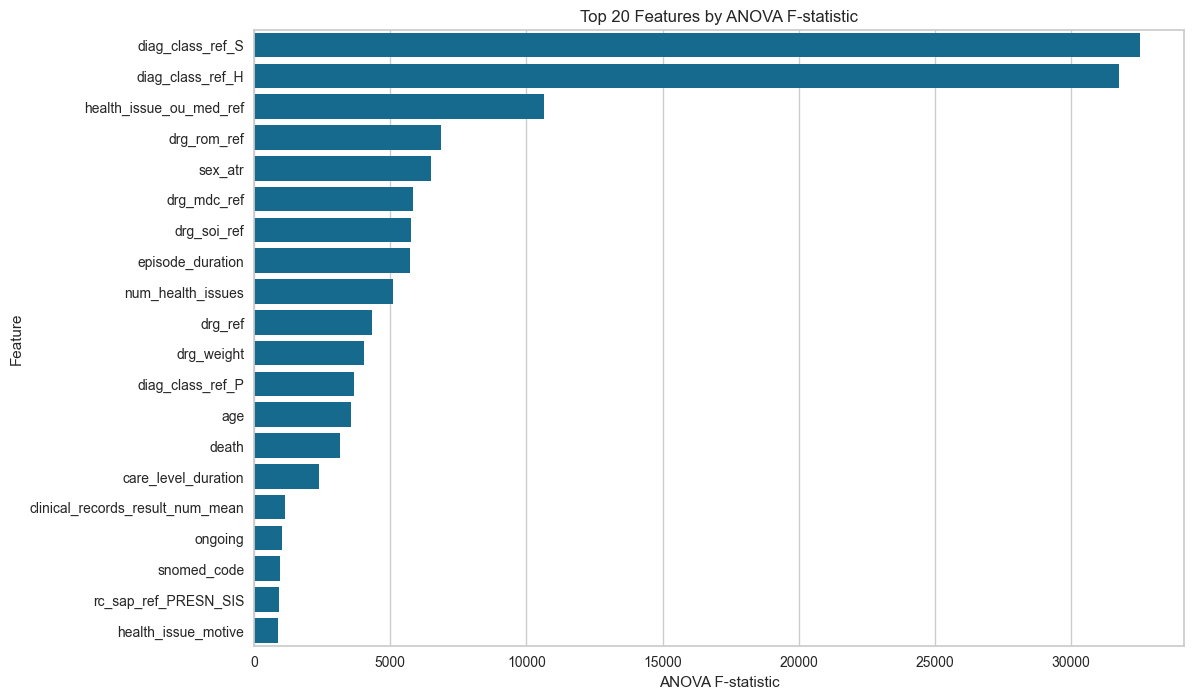

In [32]:
# Plot the top 20 anova scores
plt.figure(figsize=(12, 8))
sns.barplot(x='ANOVA F-statistic', y='Feature', data=anova_df.head(20))
plt.title('Top 20 Features by ANOVA F-statistic')
plt.xlabel('ANOVA F-statistic')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Subset 4: top 20 features from anova
top_20_anova_features = anova_df['Feature'].head(20).tolist()

# Create a new dataframe with only the top 20 features
subset_4 = X[top_20_anova_features]

# Add the icd10_capitulo column
subset_4 = pd.concat([subset_4, y], axis=1)
subset_4.to_csv('subset_4.csv', index=False)

In [34]:
# Subset 5: top 10 features from anova
top_10_anova_features = anova_df['Feature'].head(10).tolist()

# Create a new dataframe with only the top 10 features
subset_5 = X[top_10_anova_features]

# Add the icd10_capitulo column
subset_5 = pd.concat([subset_5, y], axis=1)
subset_5.to_csv('subset_5.csv', index=False)

### **Combination of Decision Trees & Univariate Selection**

In [ ]:
# Subset 6: common top 20 features from decision trees and anova

# List of top 20 features from subset_2 and subset_4
features_dt = set(subset_2.columns)
features_anova = set(subset_4.columns)

# Features common to both (intersection)
common_features = features_dt & features_anova
subset_6 = subset_1[list(common_features)]

# Add the icd10_capitulo column
subset_6 = pd.concat([subset_6, y], axis=1)
subset_6.to_csv('subset_6.csv', index=False)

In [ ]:
# Subset 7: all top 20 features from decision trees and anova

# All features from both (union)
all_features = features_dt | features_anova
subset_7 = subset_1[list(all_features)]
subset_7.to_csv('subset_7.csv', index=False)